In [1]:
import torch
import torchvision
from torchvision import transforms

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
from PIL import Image

In [4]:
use_cuda = torch.cuda.is_available()
device   = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [5]:
model = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [6]:
model.eval()
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
from google.colab import files
uploaded = files.upload()

Saving 333.jpg to 333.jpg


In [8]:
fnameLst = list(uploaded.keys())

In [9]:
fname = fnameLst[0]
print(fname)

333.jpg


In [10]:
image = cv2.imread(fname)

In [11]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

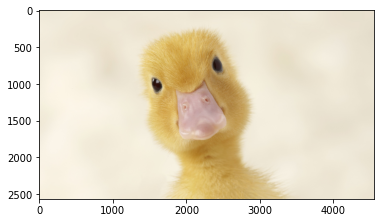

In [12]:
plt.imshow(image)
plt.show()

In [13]:
transformer = transforms.Compose([
     transforms.Resize(224),
     transforms.CenterCrop(224),            
     transforms.ToTensor(),                     
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

In [14]:
PILImg= Image.fromarray(image.astype('uint8')).convert('RGB')
PILImg = transformer(PILImg)
PILImg.shape

torch.Size([3, 224, 224])

In [15]:
imageTensor = torch.unsqueeze(PILImg, 0)
imageTensor.shape

torch.Size([1, 3, 224, 224])

In [16]:
out = model(imageTensor.to(device))   
print(out.shape)

torch.Size([1, 1000])


In [17]:
torch.max(out)

tensor(11.9731, device='cuda:0', grad_fn=<MaxBackward1>)

In [18]:
torch.argmax(out)

tensor(850, device='cuda:0')

https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a